# Getting started with Sklearn

In [1]:
%config InlineBackend.figure_format = "svg"
%matplotlib inline

## 1 - Building a regression estimator

In this exercise, you will start by importing the scikit-learn library and working with the Diabetes dataset. The goal is to load the data, split it into training and testing sets, and train a regression model to make predictions.

1. Import the necessary scikit-learn modules and load the Diabetes dataset.
3. Split the dataset into training and testing sets. Set aside 20% of the data for testing.
4. Choose a regression model from scikit-learn (e.g., Linear Regression).
5. Train the chosen regression model on the training data.
6. Use the trained regression model to make predictions on the test data.
7. Evaluate the performance of your regression model using appropriate regression metrics.

Mean Squared Error: 2900.19362849348
R-squared: 0.4526027629719197


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataset = datasets.load_diabetes()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE w/ linear regression: {mse:0.5f}")


Test MSE w/ linear regression: 2929.89529


## 2 - Visualizing overfitting

The goal here is to investigate the challenges associated with both underfitting and overfitting in machine learning, as well as demonstrate how we can leverage linear regression in conjunction with polynomial features to approximate non-linear functions.

1. Load the files `./train.csv` and `./test.csv` into Python using your method of choice. The column `x` is the feature and the column `y` is the target.
2. Fit the training data with three polynomial regression models of order 1, 4 and 13.
3. For the test set, make a plot of `x` as a function of both the true `y` and the predicted `y`.
4. Also calculate the test set performance using a performance metric (e.g., mean-squared error).
5. Discuss how each model performs in terms of generalization error.

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
X_train, y_train = np.array(train['x']), np.array(train['y'])
X_test, y_test = np.array(test['x']), np.array(test['y'])

#poly_features1_train = PolynomialFeatures(degree=1, include_bias=False)
poly4 = PolynomialFeatures(degree=4, include_bias=False)
poly13 = PolynomialFeatures(degree=13, include_bias=False)

#poly_features1_train.fit_transform(X_train.reshape(-1, 1))
poly_features4_train = poly4.fit_transform(X_train.reshape(-1, 1))
poly_features13_train = poly13.fit_transform(X_train.reshape(-1, 1))

#poly_features1_test.fit_transform(X_test.reshape(-1, 1))
poly_features4_test = poly4.fit_transform(X_test.reshape(-1, 1))
poly_features13_test = poly13.fit_transform(X_test.reshape(-1, 1))

poly_reg_model1 = LinearRegression()
poly_reg_model4 = LinearRegression()
poly_reg_model13 = LinearRegression()

poly_reg_model1.fit(X_train.reshape(-1,1), y_train)
poly_reg_model4.fit(poly_features4_train, y_train)
poly_reg_model13.fit(poly_features13_train, y_train)

y_pred1 = poly_reg_model1.predict(X_test.reshape(-1,1))
y_pred4 = poly_reg_model4.predict(poly_features4_test)
y_pred13 = poly_reg_model13.predict(poly_features13_test)

mse1 = mean_squared_error(y_test, y_pred1)
mse4 = mean_squared_error(y_test, y_pred4)
mse13 = mean_squared_error(y_test, y_pred13)

print(f"Test MSE w/ 1st order polynomial regression: {mse1:0.5f}")
print(f"Test MSE w/ 4th order polynomial regression: {mse4:0.5f}")
print(f"Test MSE w/ 13th order polynomial regression: {mse13:0.5f}")


Test MSE w/ 1st order polynomial regression: 0.19251
Test MSE w/ 4th order polynomial regression: 0.00121
Test MSE w/ 13th order polynomial regression: 0.14531


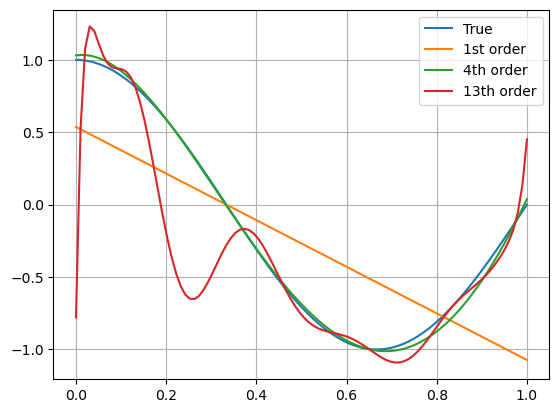

In [42]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_test, label='True')
plt.plot(X_test, y_pred1, label='1st order')
plt.plot(X_test, y_pred4, label='4th order')
plt.plot(X_test, y_pred13, label='13th order')
plt.legend()
plt.grid(True)

## 3 - Data preprocessing

In this exercise, the goal is to prepare data for classification and compare the performance of two models.
1. Load the file `./plants.csv` and prepare the data for modelling.
2. Split the dataset into training and testing sets. Set aside 20% of the data for testing.
3. Build two classification model (i.e., any classifiers of your choice) to predict the target variable based on the features.
4. Compare the performance of the two models using suitable metrics, and determine which one you would choose.

In [328]:
data = pd.read_csv('./plants.csv')
columns = data.columns

petal_lengths = np.flip(np.unique(data['petal_length']))
for i in range(len(petal_lengths)):
    data['petal_length'].loc[data['petal_length'] == petal_lengths[i]] = i

#labels = np.unique(data['plant'])
#for i in range(len(labels)):
#    data['plant'].loc[data['plant'] == labels[i]] = i
    
X = np.array(data[columns[:-1]])
y = np.array(data[columns[-1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


/var/folders/gz/cn8gtry919s327bhw3j21y7w0000gn/T/ipykernel_9571/3553087050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['petal_length'].loc[data['petal_length'] == petal_lengths[i]] = i


In [349]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(max_depth=20, n_estimators=50, max_features=1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test)
acc_neigh = accuracy_score(y_test, y_pred_neigh)

print(f"Test accuracy random forest: {acc_rf:0.5f}")
print(f"Test accuracy 3NN: {acc_neigh:0.5f}")


Test accuracy random forest: 0.83333
Test accuracy 3NN: 0.80000


## 4 - Time for a competition (to be explained in class)

https://www.kaggle.com/t/8bbfadab336347668138cde9ac6cd51e